# Initial calibration

### Setup

In [1]:
import logging, logging.config
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pickle
import numpy as np
import pandas as pd
import yaml

from simulation_utils.preference import generate_ibp_itemwise, records2frame
from simulation_utils.observation import sample_uniform_n
from simulation_utils.utils import truncated_beta_binomial, truncated_pareto
from simulation_utils.preference import generate_ibp_nbp
from simulation_utils.datasets import ml_100k

import simulation_utils as sims_utils
%matplotlib inline

### Read data

In [2]:
data = ml_100k()
nusers = len(data['user'].unique())
nitems = len(data['item'].unique())

In [3]:
print(nusers, nitems)

943 1682


In [4]:
data.head()

user  item  rating
0   196   242       3
1   186   302       3
2    22   377       1
3   244    51       2
4   166   346       1

In [6]:
def generate_ibp_rowwise(nusers, alpha, c=1, sigma=0):
    users = generate_ibp_nbp(nusers, alpha, c, sigma)
    df = records2frame(users)
    return df

In [7]:
# def truncated_poisson(lam, size=None):
#     k = np.ones(size)
#     t = np.exp(-lam) / (1 - np.exp(-lam)) * lam
#     s = t
#     u = np.random.random(size)
#     condition = s < u
#     while any(condition):
#         k[condition] = k[condition] + 1
#         t = t * lam / k
#         s = s + t
#         condition = s < u
#     return k

In [8]:
# def truncated_pareto(b, loc=0, scale=1, size=1, random_state=None):
#     pareto_rvs = pareto.rvs(b, loc, scale, size, random_state=random_state)
#     return pareto_rvs.astype(np.int64)

### Check point

In [7]:
import os
import re

In [8]:
pattern = re.compile('eval_results_2019-02-12.*.pkl')
filenames = [fn for fn in os.listdir('build') if pattern.match(fn)]

In [9]:
filenames

['eval_results_2019-02-12-12-48-10.pkl',
 'eval_results_2019-02-12-12-48-44.pkl']

In [10]:
results = []
for fn in filenames:
    path = os.path.join('build', fn)
    with open(path, 'rb') as f:
        result = pickle.load(f)
    results.extend(result)

In [11]:
res_df = pd.DataFrame(results)

In [13]:
res_df.head()

item_popularity_kl_divergence               obs     obs_a  obs_alpha  \
0                       0.852992  sample_uniform_n       NaN   0.510528   
1                       0.821787  sample_uniform_n  0.000017        NaN   
2                       0.703381  sample_uniform_n       NaN   0.510528   
3                       0.604738  sample_uniform_n  0.000017        NaN   
4                       0.461415  sample_uniform_n       NaN   0.510528   

      obs_b            obs_dist_func  obs_m  obs_n  obs_use_cap  \
0       NaN         truncated_pareto   20.0    NaN         True   
1  2.815789  truncated_beta_binomial    NaN  737.0         True   
2       NaN         truncated_pareto   20.0    NaN         True   
3  2.815789  truncated_beta_binomial    NaN  737.0         True   
4       NaN         truncated_pareto   20.0    NaN         True   

              pref  pref_alpha    pref_c  pref_nusers  pref_sigma  \
0  generate_ibp_df  319.747772  0.037382          943    0.000000   
1  generate_ibp_df  319.747772  0.037382          943    0.000000   
2  generate_ibp_df  319.747772  0.037382          943    0.037131   
3  generate_ibp_df  319.747772  0.037382          943    0.037131   
4  generate_ibp_df  319.747772  0.037382          943    0.083433   

   user_activity_kl_divergence  
0                     0.213887  
1                     0.182951  
2                     0.209175  
3                     0.173134  
4                     0.203427

In [14]:
res_df.shape

(18480, 15)

In [15]:
res_df[res_df['item_popularity_kl_divergence'] < 2].sort_values(['item_popularity_kl_divergence', 'user_activity_kl_divergence']).head(10)

item_popularity_kl_divergence               obs     obs_a  obs_alpha  \
2135                       0.140638  sample_uniform_n  0.000017        NaN   
793                        0.144757  sample_uniform_n  0.000017        NaN   
792                        0.145363  sample_uniform_n       NaN   0.510528   
374                        0.146949  sample_uniform_n       NaN   0.510528   
396                        0.147190  sample_uniform_n       NaN   0.510528   
1320                       0.147548  sample_uniform_n       NaN   0.510528   
418                        0.150638  sample_uniform_n       NaN   0.510528   
2553                       0.151132  sample_uniform_n  0.000017        NaN   
880                        0.151959  sample_uniform_n       NaN   0.510528   
814                        0.154871  sample_uniform_n       NaN   0.510528   

         obs_b            obs_dist_func  obs_m  obs_n  obs_use_cap  \
2135  2.815789  truncated_beta_binomial    NaN  737.0         True   
793   2.815789  truncated_beta_binomial    NaN  737.0         True   
792        NaN         truncated_pareto   20.0    NaN         True   
374        NaN         truncated_pareto   20.0    NaN         True   
396        NaN         truncated_pareto   20.0    NaN         True   
1320       NaN         truncated_pareto   20.0    NaN         True   
418        NaN         truncated_pareto   20.0    NaN         True   
2553  2.815789  truncated_beta_binomial    NaN  737.0         True   
880        NaN         truncated_pareto   20.0    NaN         True   
814        NaN         truncated_pareto   20.0    NaN         True   

                 pref  pref_alpha    pref_c  pref_nusers  pref_sigma  \
2135  generate_ibp_df  462.193715  0.555630          943         0.0   
793   generate_ibp_df  381.627598  0.794155          943         0.0   
792   generate_ibp_df  381.627598  0.794155          943         0.0   
374   generate_ibp_df  319.747772  0.844142          943         0.0   
396   generate_ibp_df  319.747772  0.847309          943         0.0   
1320  generate_ibp_df  393.624005  0.847309          943         0.0   
418   generate_ibp_df  319.747772  0.847973          943         0.0   
2553  generate_ibp_df  498.604184  0.502085          943         0.0   
880   generate_ibp_df  381.627598  0.847973          943         0.0   
814   generate_ibp_df  381.627598  0.836086          943         0.0   

      user_activity_kl_divergence  
2135                     0.155270  
793                      0.155794  
792                      0.174810  
374                      0.191353  
396                      0.189911  
1320                     0.181793  
418                      0.175967  
2553                     0.151507  
880                      0.186491  
814                      0.206097

In [16]:
res_df[res_df['item_popularity_kl_divergence'] < 0.16].sort_values(['user_activity_kl_divergence', 'item_popularity_kl_divergence']).head(10)

item_popularity_kl_divergence               obs     obs_a  obs_alpha  \
2553                       0.151132  sample_uniform_n  0.000017        NaN   
2135                       0.140638  sample_uniform_n  0.000017        NaN   
793                        0.144757  sample_uniform_n  0.000017        NaN   
859                        0.159509  sample_uniform_n  0.000017        NaN   
331                        0.154945  sample_uniform_n  0.000017        NaN   
1631                       0.158525  sample_uniform_n  0.000017        NaN   
1255                       0.156034  sample_uniform_n  0.000017        NaN   
815                        0.159144  sample_uniform_n  0.000017        NaN   
1342                       0.155060  sample_uniform_n       NaN   0.510528   
397                        0.155553  sample_uniform_n  0.000017        NaN   

         obs_b            obs_dist_func  obs_m  obs_n  obs_use_cap  \
2553  2.815789  truncated_beta_binomial    NaN  737.0         True   
2135  2.815789  truncated_beta_binomial    NaN  737.0         True   
793   2.815789  truncated_beta_binomial    NaN  737.0         True   
859   2.815789  truncated_beta_binomial    NaN  737.0         True   
331   2.815789  truncated_beta_binomial    NaN  737.0         True   
1631  2.815789  truncated_beta_binomial    NaN  737.0         True   
1255  2.815789  truncated_beta_binomial    NaN  737.0         True   
815   2.815789  truncated_beta_binomial    NaN  737.0         True   
1342       NaN         truncated_pareto   20.0    NaN         True   
397   2.815789  truncated_beta_binomial    NaN  737.0         True   

                 pref  pref_alpha    pref_c  pref_nusers  pref_sigma  \
2553  generate_ibp_df  498.604184  0.502085          943    0.000000   
2135  generate_ibp_df  462.193715  0.555630          943    0.000000   
793   generate_ibp_df  381.627598  0.794155          943    0.000000   
859   generate_ibp_df  381.627598  0.847309          943    0.000000   
331   generate_ibp_df  319.747772  0.794155          943    0.000000   
1631  generate_ibp_df  432.906223  0.502085          943    0.037131   
1255  generate_ibp_df  393.624005  0.794155          943    0.000000   
815   generate_ibp_df  381.627598  0.836086          943    0.000000   
1342  generate_ibp_df  393.624005  0.847973          943    0.000000   
397   generate_ibp_df  319.747772  0.847309          943    0.000000   

      user_activity_kl_divergence  
2553                     0.151507  
2135                     0.155270  
793                      0.155794  
859                      0.155887  
331                      0.160367  
1631                     0.160923  
1255                     0.163880  
815                      0.167664  
1342                     0.168606  
397                      0.168857

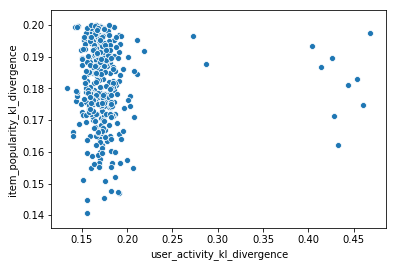

In [17]:
sns.scatterplot('user_activity_kl_divergence', 'item_popularity_kl_divergence', data=res_df[res_df['item_popularity_kl_divergence'] < 0.2])

### KL divergence vs. parameters

In [18]:
res_df_tall = res_df[['item_popularity_kl_divergence', 'obs_dist_func', 'pref_alpha', 'pref_c', 'pref_sigma', 'user_activity_kl_divergence']].melt(
    id_vars = ['obs_dist_func', 'pref_alpha', 'pref_c', 'pref_sigma'],
    value_vars=['item_popularity_kl_divergence', 'user_activity_kl_divergence'],
    var_name = 'statistics',
    value_name = 'score'
)

alpha

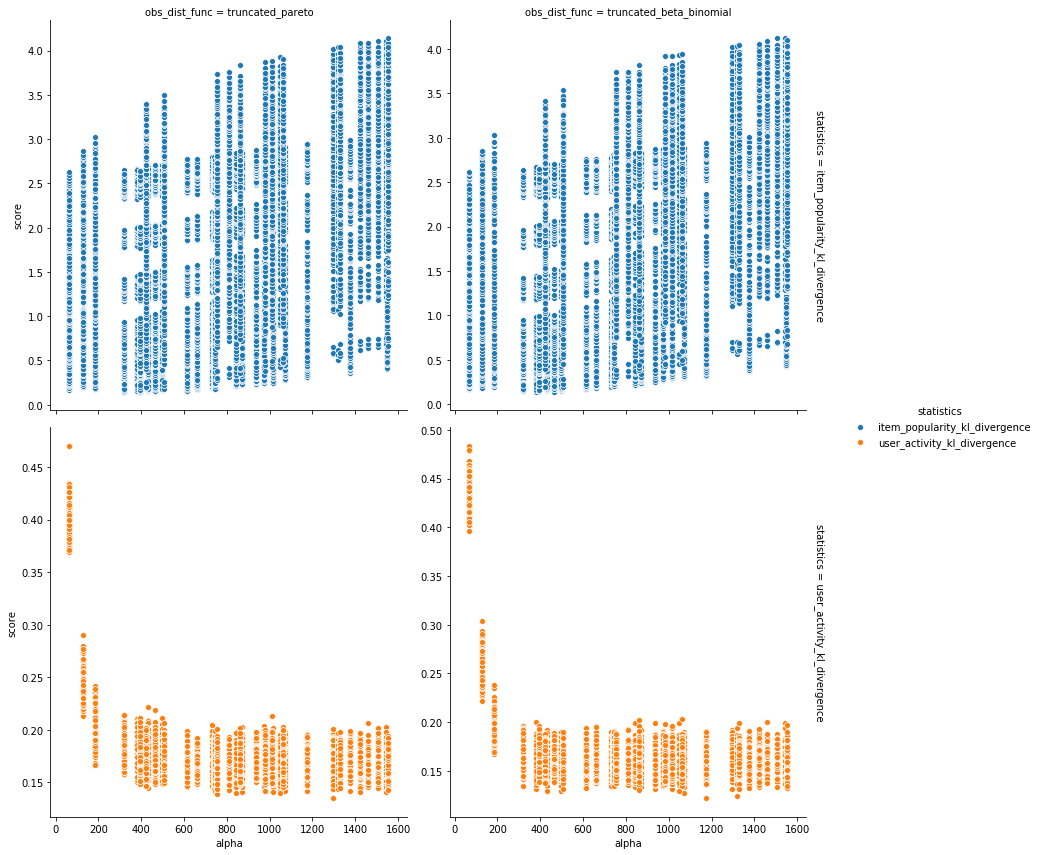

In [19]:
g = sns.FacetGrid(res_df_tall, col='obs_dist_func', hue='statistics', row='statistics', height=6, sharey=False, margin_titles=True)
g = (g.map(sns.scatterplot, 'pref_alpha', 'score')
     .add_legend()
     .set_axis_labels('alpha', 'score'))

c

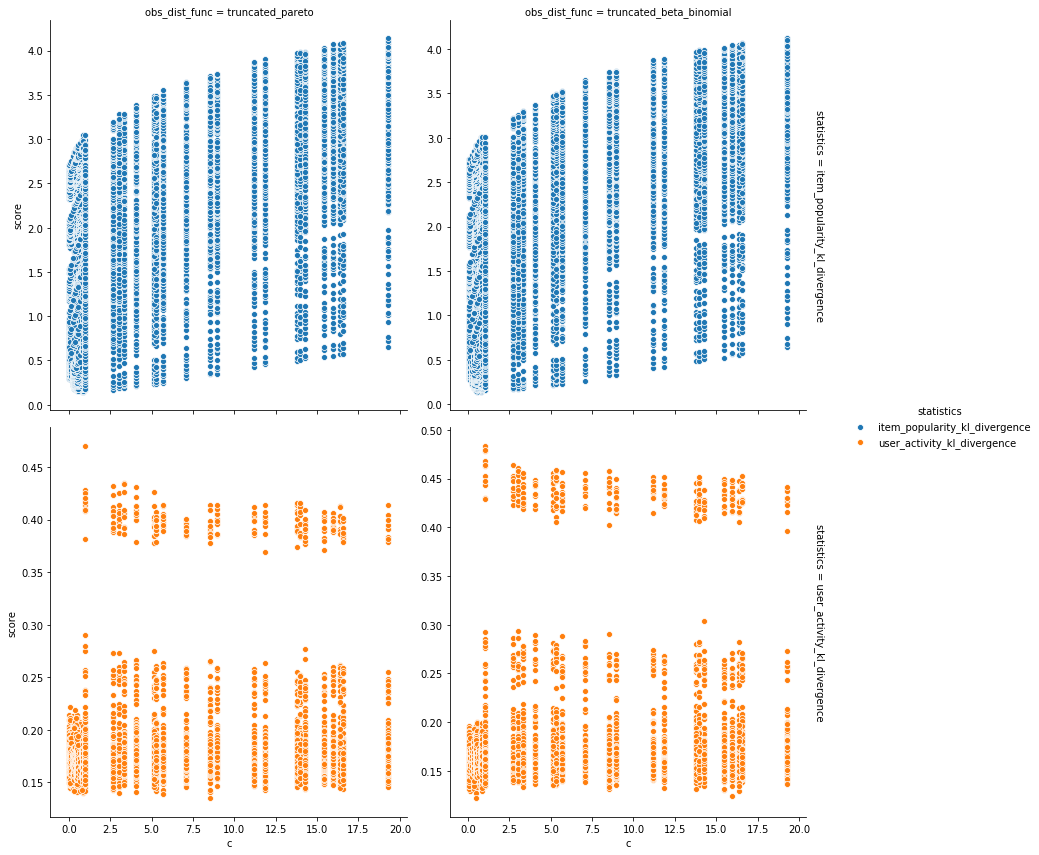

In [20]:
g = sns.FacetGrid(res_df_tall, col='obs_dist_func', hue='statistics', row='statistics', height=6, sharey=False, margin_titles=True)
g = (g.map(sns.scatterplot, 'pref_c', 'score')
     .add_legend()
     .set_axis_labels('c', 'score'))

Sigma

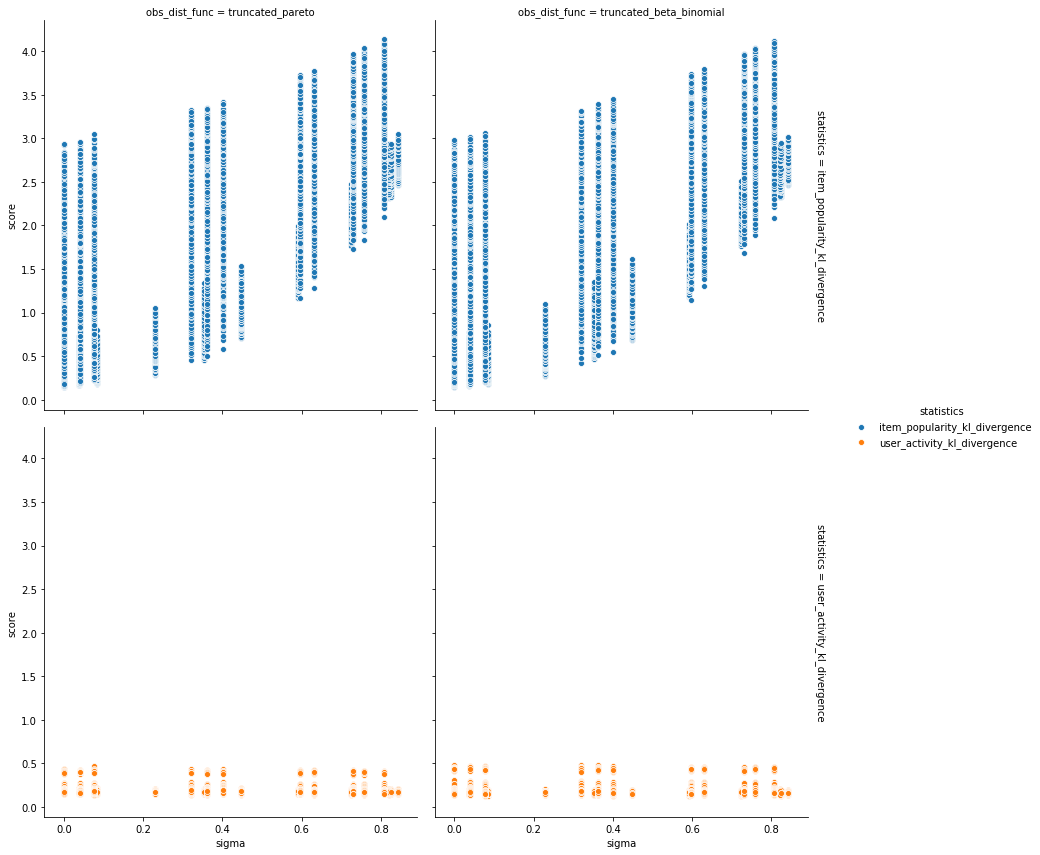

In [21]:
g = sns.FacetGrid(res_df_tall, col='obs_dist_func', hue='statistics', row='statistics', height=6, margin_titles=True)
g = (g.map(sns.scatterplot, 'pref_sigma', 'score')
     .add_legend()
     .set_axis_labels('sigma', 'score'))

In [22]:
def plot_scatter3d(x, y, z, c, **kwargs):
    ax = plt.gca()
    kwargs.pop('color')
    p = ax.scatter(x, y, z, c=c, **kwargs)
#     plt.colorbar(p, shrink=0.5, aspect=5)
    ax.set_zlabel('c')

In [23]:
cmap_name = None
cmap = plt.get_cmap(cmap_name)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(res_df_tall['score'])

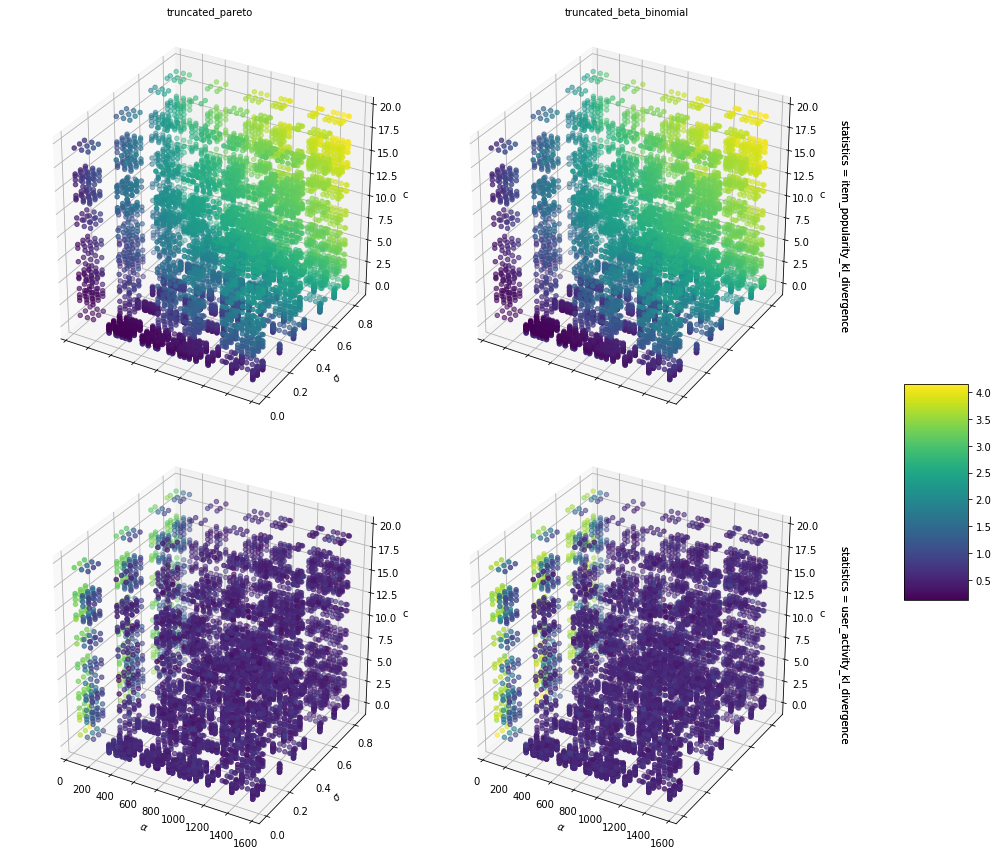

In [24]:
g = sns.FacetGrid(res_df_tall, col='obs_dist_func', row='statistics', height=6, margin_titles=True, subplot_kws=dict(projection='3d'))
g = (g.map(plot_scatter3d, 'pref_alpha', 'pref_sigma', 'pref_c', 'score', cmap=cmap)
     .set_titles(col_template='{col_name}')
     .set_axis_labels(r'$\alpha$', r'$\sigma$'))
cax = g.fig.add_axes([1.05, 0.3, 0.075, 0.25])
plt.colorbar(sm, cax=cax)

Generate simulated data using the best parameters

In [25]:
def simulated_data_bb(nusers=943, alpha=1009.2, c=0.3, sigma=0.8):
#     pref = generate_ibp_df(943, 1009.2, 0.3, 0.8)
    pref = generate_ibp_itemwise(nusers, alpha, c, sigma)
    obs = sample_uniform_n(pref, truncated_beta_binomial, True, a=1.6638872003071793e-05, b=2.8157887296158077, n=737)
    return obs

In [26]:
def simulated_data_pareto(nusers=943, alpha=799.486970, c=0.910087, sigma=0):
#     pref = generate_ibp_df(943, 1009.2, 10, 0)
    pref = generate_ibp_itemwise(nusers, alpha, c, sigma)
    obs = sample_uniform_n(pref, truncated_pareto, True, m=20.00000045, alpha=0.510528)
    return obs

In [27]:
def simulated_data(name, *args, **kwargs):
    out = None
    if 'TBB' in name:
        out = simulated_data_bb(*args, **kwargs)
    if 'TP' in name:
        out = simulated_data_pareto(*args, **kwargs)
    return out

In [28]:
# def simulated_data_geo():
#     pref = generate_ibp_df(943, 1009, 1, 0)
#     obs = sample_popular_n(pref, np.random.geometric, False, p=0.05)
#     return obs

In [29]:
def compute_density(data):
    nusers = len(data['user'].unique())
    nitems = len(data['item'].unique())
    npairs = len(data)
    density = npairs / nitems / nusers
    return nusers, nitems, npairs, density

In [30]:
def compute_data_stats(data):
    pairs = data.loc[:, ['user', 'item']]
    user_activity = pairs.groupby('user', as_index=False).count().rename(columns={'item': 'count'})
    item_popularity = pairs.groupby('item', as_index=False).count().rename(columns={'user': 'count'})
    return user_activity, item_popularity

In [31]:
def summarize_dataset(name, data_func, *args, **kwargs):
    dataset = data_func(*args, **kwargs)
    colname = dataset.columns
    if not {'user', 'item'}.issubset(colname):
        dataset.rename(columns={colname[0]: 'user',
                                colname[1]: 'item'},
                       inplace=True)
    dataset = dataset[['user', 'item']]
    data_meta = compute_density(dataset)
    data_meta_stats = tuple([name, *data_meta])
    
    user_activity, item_popularity = compute_data_stats(dataset)
    user_activity['dataset'] = name
    user_activity.drop('user', axis=1, inplace=True)
    item_popularity['dataset'] = name
    item_popularity.drop('item', axis=1, inplace=True)
    item_popularity['rank'] = item_popularity['count'].rank(method='min', ascending=False)

    user_activity_stats = user_activity['count'].rename(name).describe()
    item_popularity_stats = item_popularity['count'].rename(name).describe()
    return data_meta_stats, user_activity_stats, item_popularity_stats, user_activity, item_popularity

In [32]:
res_df['distance'] = res_df['item_popularity_kl_divergence'] ** 2 + res_df['user_activity_kl_divergence'] ** 2

In [33]:
res_df.head()

item_popularity_kl_divergence               obs     obs_a  obs_alpha  \
0                       0.852992  sample_uniform_n       NaN   0.510528   
1                       0.821787  sample_uniform_n  0.000017        NaN   
2                       0.703381  sample_uniform_n       NaN   0.510528   
3                       0.604738  sample_uniform_n  0.000017        NaN   
4                       0.461415  sample_uniform_n       NaN   0.510528   

      obs_b            obs_dist_func  obs_m  obs_n  obs_use_cap  \
0       NaN         truncated_pareto   20.0    NaN         True   
1  2.815789  truncated_beta_binomial    NaN  737.0         True   
2       NaN         truncated_pareto   20.0    NaN         True   
3  2.815789  truncated_beta_binomial    NaN  737.0         True   
4       NaN         truncated_pareto   20.0    NaN         True   

              pref  pref_alpha    pref_c  pref_nusers  pref_sigma  \
0  generate_ibp_df  319.747772  0.037382          943    0.000000   
1  generate_ibp_df  319.747772  0.037382          943    0.000000   
2  generate_ibp_df  319.747772  0.037382          943    0.037131   
3  generate_ibp_df  319.747772  0.037382          943    0.037131   
4  generate_ibp_df  319.747772  0.037382          943    0.083433   

   user_activity_kl_divergence  distance  
0                     0.213887  0.773342  
1                     0.182951  0.708805  
2                     0.209175  0.538498  
3                     0.173134  0.395683  
4                     0.203427  0.254287

In [34]:
res_params = res_df[['obs_dist_func', 'pref_nusers', 'pref_alpha', 'pref_c', 'pref_sigma', 'item_popularity_kl_divergence', 'user_activity_kl_divergence', 'distance']]

In [35]:
NPARAMS = 10
ip_params = res_params.sort_values(['obs_dist_func', 'item_popularity_kl_divergence']).groupby('obs_dist_func').head(NPARAMS)
ua_params = res_params.sort_values(['obs_dist_func', 'user_activity_kl_divergence']).groupby('obs_dist_func').head(NPARAMS)
d_params = res_params.sort_values(['obs_dist_func', 'distance']).groupby('obs_dist_func').head(NPARAMS)

In [36]:
from itertools import repeat

In [37]:
def summarize_datasets(params):
    from multiprocessing import Pool
    params = params.join(params.groupby('obs_dist_func').cumcount().rename('param_no'))
    params['name'] = params['obs_dist_func'].map(lambda x: ''.join(next(zip(*x.split('_')))).upper()) + params['param_no'].map(str)
    params = zip(params['name'].values, repeat(simulated_data), 
                 *params[['name', 'pref_nusers', 'pref_alpha', 'pref_c', 'pref_sigma']].to_dict('list').values()) 
    with Pool(10) as p:
        results = p.starmap(summarize_dataset, params)
    simulated_results = zip(*results)
    ml_100k_results = summarize_dataset('ml_100k', ml_100k)
    df = pd.DataFrame.from_records([ml_100k_results[0], *next(simulated_results)],
                               columns=['dataset', 'nusers', 'nitems', 'npairs', 'density'])
    print('dataset stats')
    print(df)

    df = pd.concat([ml_100k_results[1], *next(simulated_results)], axis=1)
    print('user profile stats')
    print(df)

    df = pd.concat([ml_100k_results[2], *next(simulated_results)], axis=1)
    print('item popularity stats')
    print(df)

    user_profile_df = pd.concat(next(simulated_results), axis=0, ignore_index=True)

    item_popularity_df = pd.concat(next(simulated_results), axis=0, ignore_index=True)
    return ml_100k_results[3:], user_profile_df, item_popularity_df

#### Top10 parameters sorted by item popularity KL

In [38]:
ml_100k_results, user_profile_df, item_popularity_df = summarize_datasets(ip_params)

dataset stats
    dataset  nusers  nitems  npairs   density
0   ml_100k     943    1682  100000  0.063047
1      TBB0     943    1776  100085  0.059761
2      TBB1     943    1971   98155  0.052810
3      TBB2     943    1855  101168  0.057835
4      TBB3     943    1776   97135  0.057999
5      TBB4     943    1782   96816  0.057614
6      TBB5     943    1995   98694  0.052461
7      TBB6     943    2024   96788  0.050711
8      TBB7     943    1788   96670  0.057334
9      TBB8     943    1799   99629  0.058728
10     TBB9     943    1992   98781  0.052586
11      TP0     943    1968   98018  0.052816
12      TP1     943    1687   99155  0.062329
13      TP2     943    1783  100003  0.059477
14      TP3     943    2101   95863  0.048385
15      TP4     943    1764   91147  0.054794
16      TP5     943    2110   99932  0.050224
17      TP6     943    2121  108877  0.054436
18      TP7     943    2174  100693  0.049117
19      TP8     943    1445  103899  0.076249
20      TP9     943 

In [39]:
def plot_scatter_against_baseline(*args, **kwargs):
    data = pd.concat(args, axis=1)
    data['dataset'] = kwargs.get('label')
    base = kwargs.pop('baseline')
    data = data.append(base[data.columns], ignore_index=True)
    args = map(lambda x: x.name, args)
    kwargs['label'] = data['dataset'].unique()
    ax = sns.scatterplot(*args, data=data, **kwargs)
    return ax

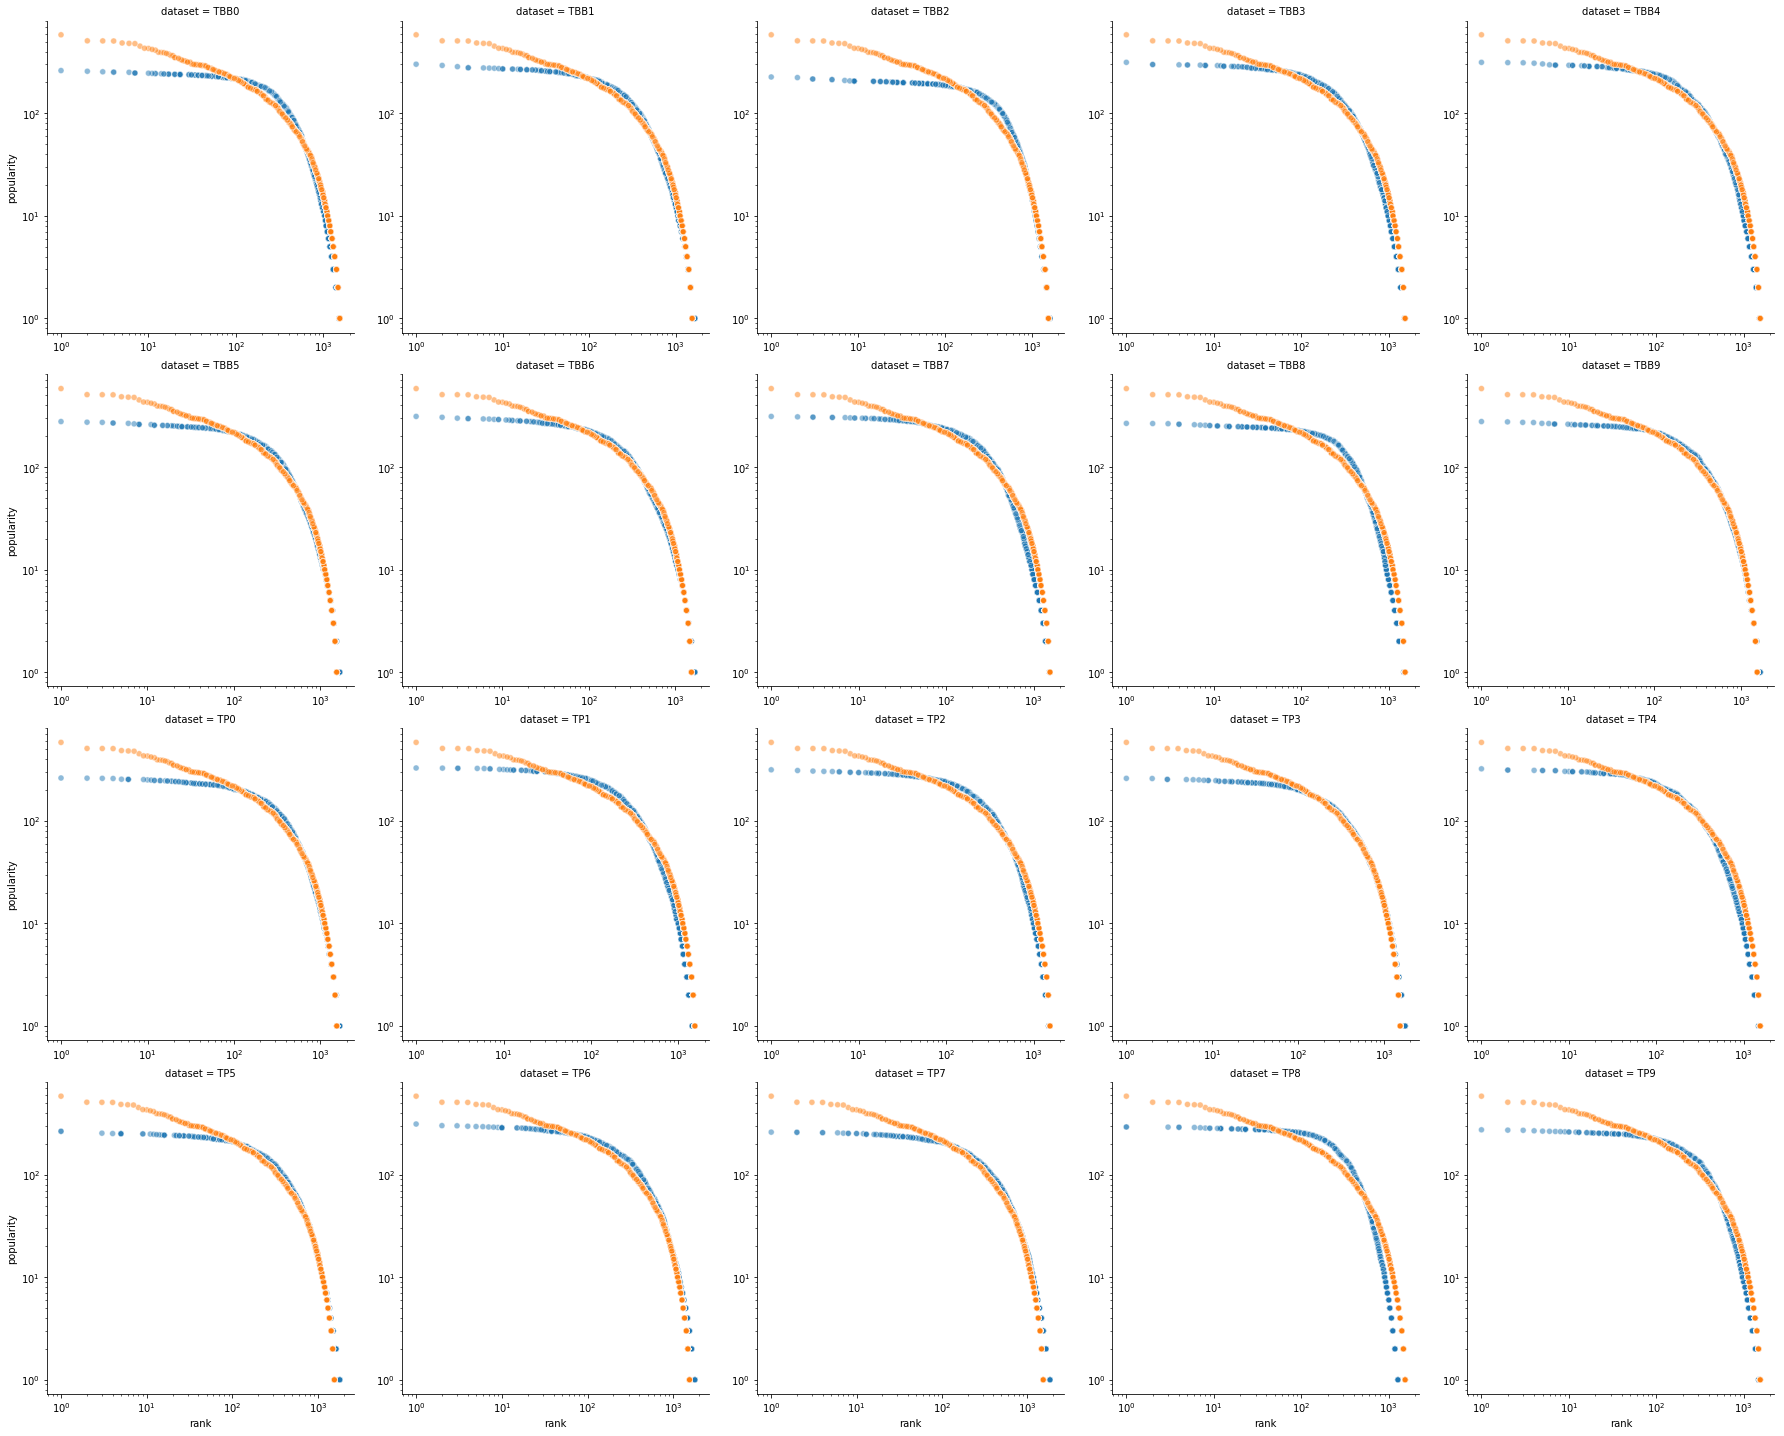

In [40]:
g = sns.FacetGrid(item_popularity_df, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'rank', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_results[1])
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity'))

In [41]:
popularity_counts = (item_popularity_df[['dataset', 'count']].groupby(['dataset', 'count'])
                     .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))
ml_100k_pop_counts = (ml_100k_results[1][['dataset', 'count']].groupby(['dataset', 'count'])
                      .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))

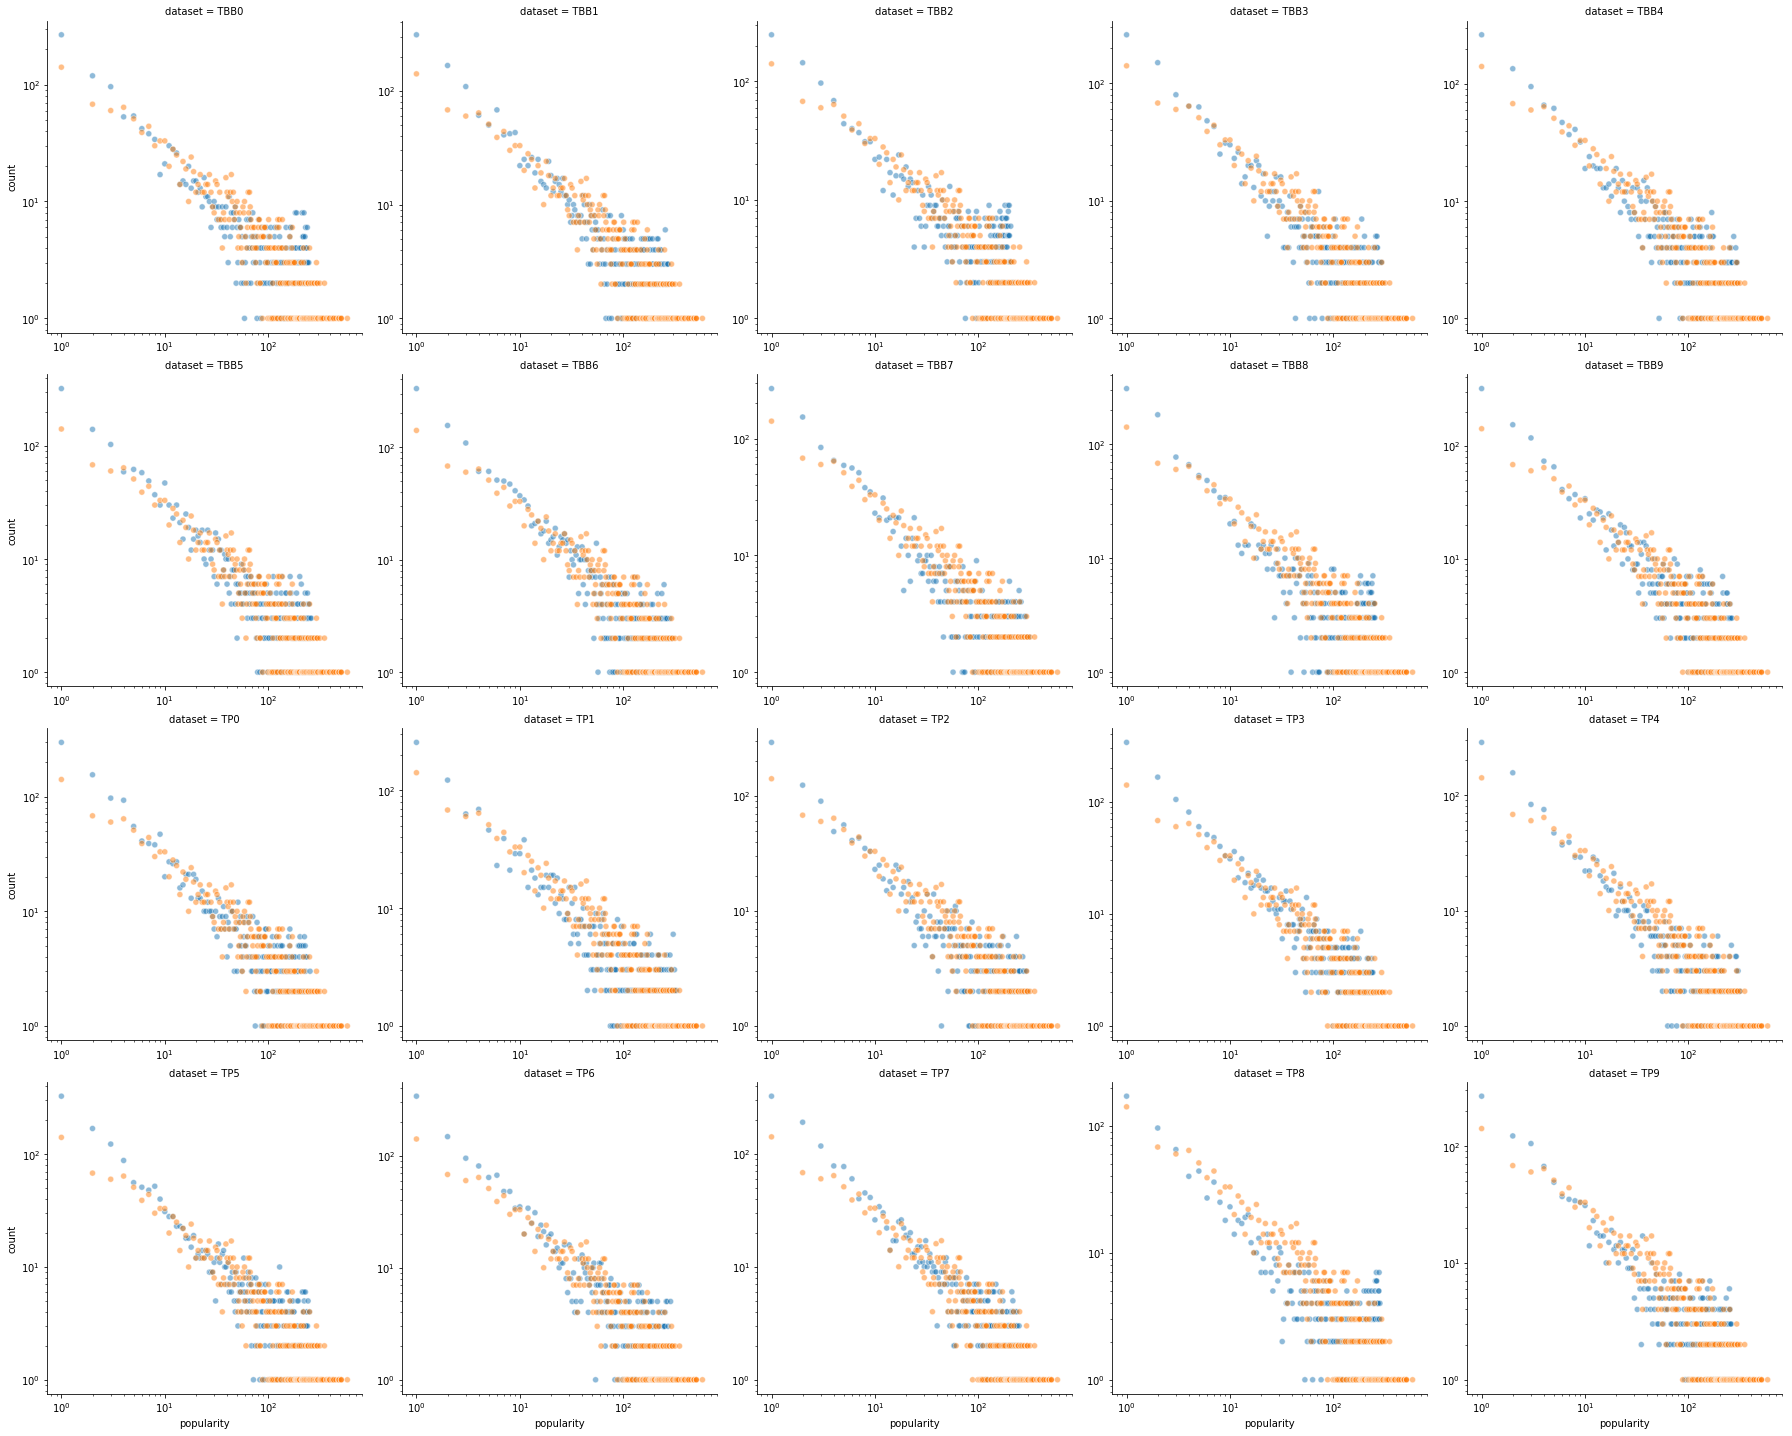

In [42]:
g = sns.FacetGrid(popularity_counts, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'popularity', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_pop_counts)
     .set(xscale='log', yscale='log'))

#### Top10 parameters sorted by user activity KL

In [43]:
ml_100k_results, user_profile_df, item_popularity_df = summarize_datasets(ua_params)

dataset stats
    dataset  nusers  nitems  npairs   density
0   ml_100k     943    1682  100000  0.063047
1      TBB0     943   24389  101514  0.004414
2      TBB1     943   40055  101514  0.002688
3      TBB2     943    4520  101514  0.023816
4      TBB3     943   50717  101514  0.002123
5      TBB4     943   43793  100907  0.002443
6      TBB5     943   32064  100347  0.003319
7      TBB6     943   46110  101514  0.002335
8      TBB7     943   28015   99184  0.003754
9      TBB8     943   48176  101514  0.002235
10     TBB9     943   76976  101514  0.001398
11      TP0     943   30475  118459  0.004122
12      TP1     943   47515  108152  0.002414
13      TP2     943   15702  112791  0.007617
14      TP3     943   24021  111835  0.004937
15      TP4     943   38861  115378  0.003148
16      TP5     943   58029  106758  0.001951
17      TP6     943   63704  116546  0.001940
18      TP7     943   42409  111193  0.002780
19      TP8     943   33826  114760  0.003598
20      TP9     943 

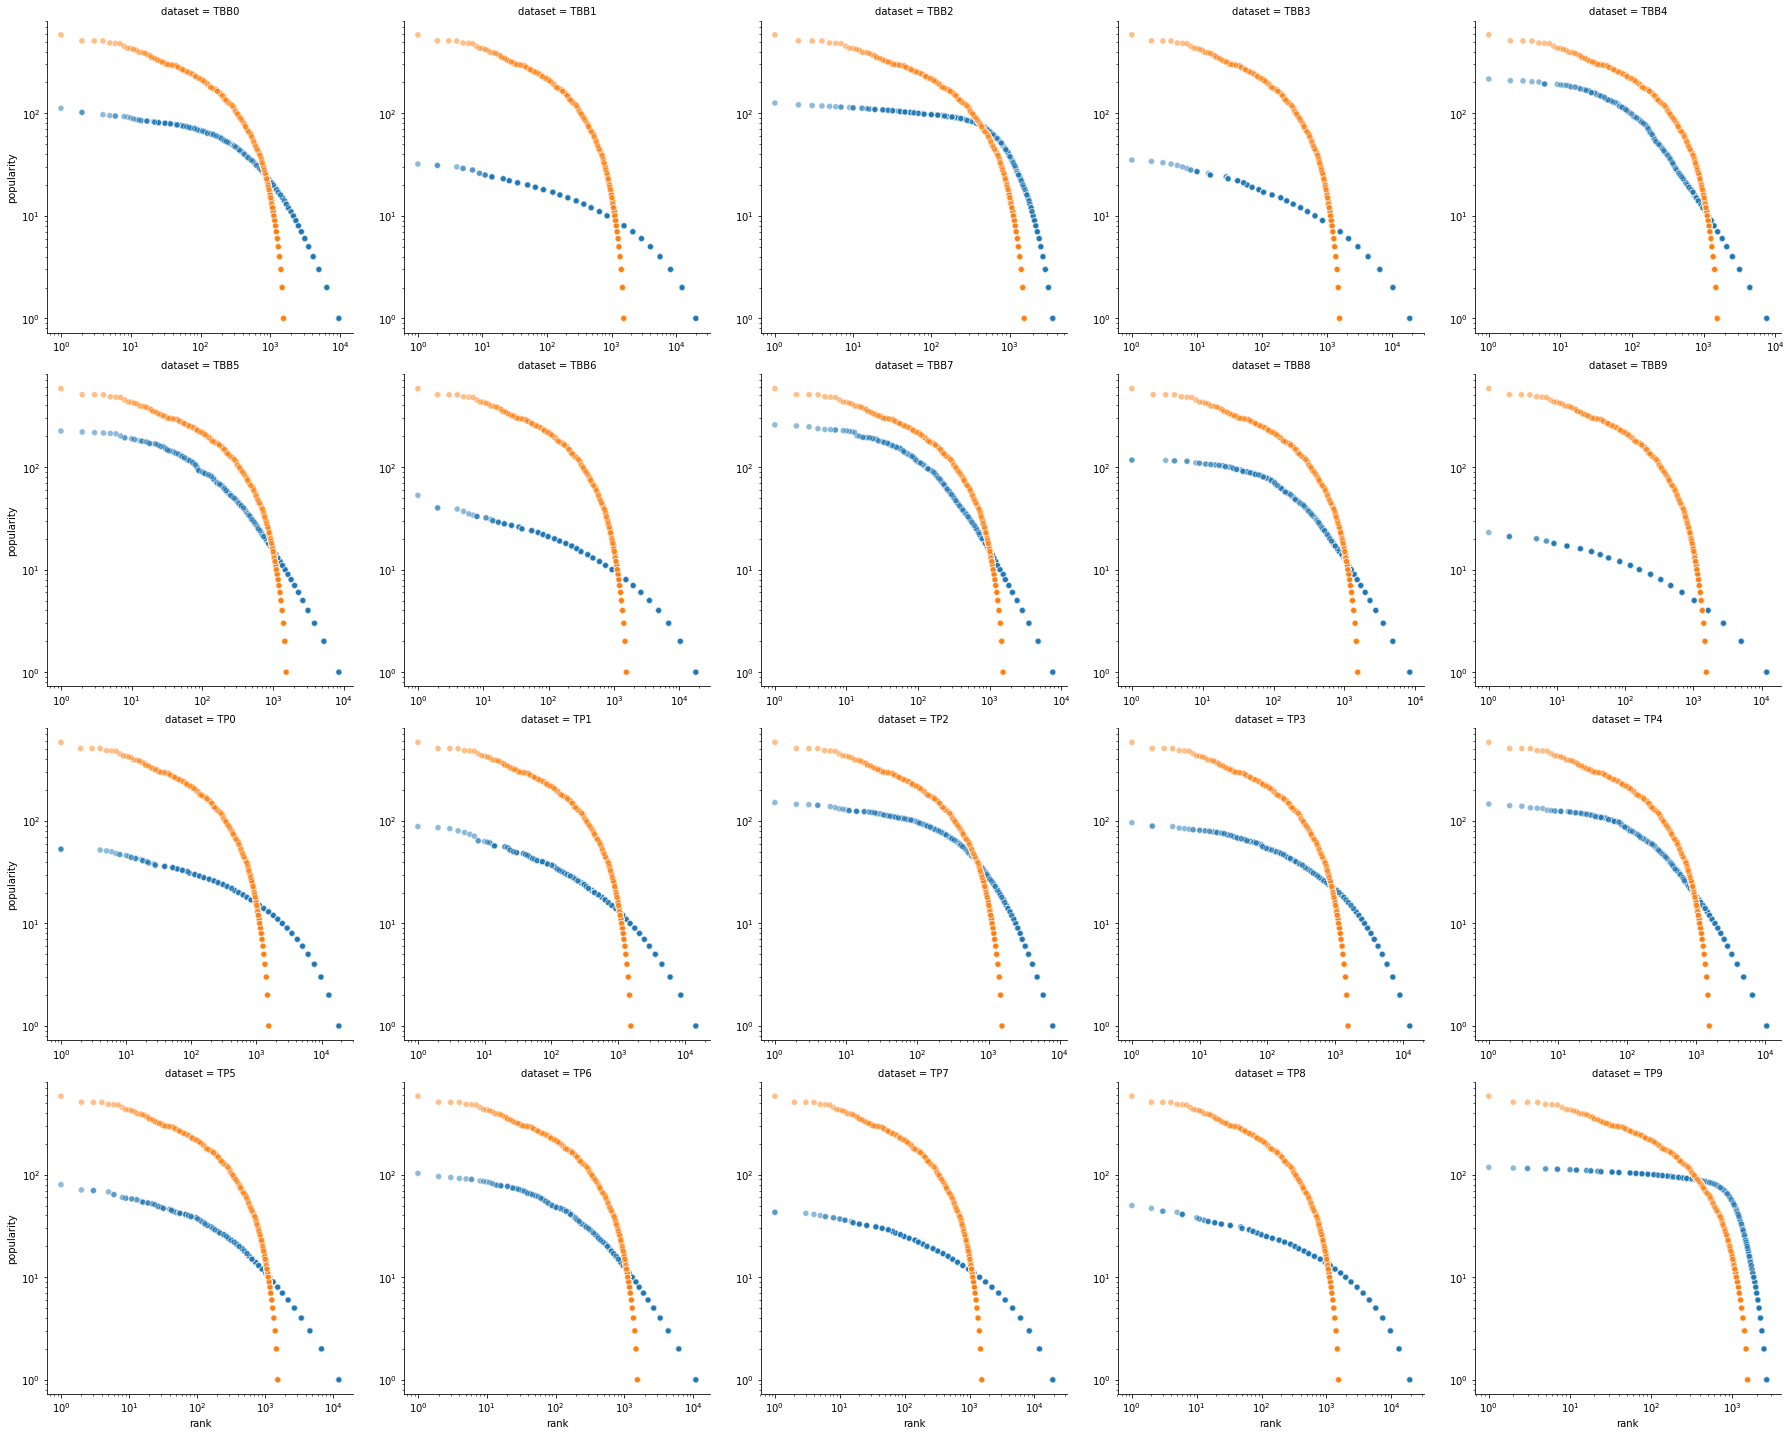

In [44]:
g = sns.FacetGrid(item_popularity_df, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'rank', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_results[1])
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity'))

In [45]:
popularity_counts = (item_popularity_df[['dataset', 'count']].groupby(['dataset', 'count'])
                     .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))
ml_100k_pop_counts = (ml_100k_results[1][['dataset', 'count']].groupby(['dataset', 'count'])
                      .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))

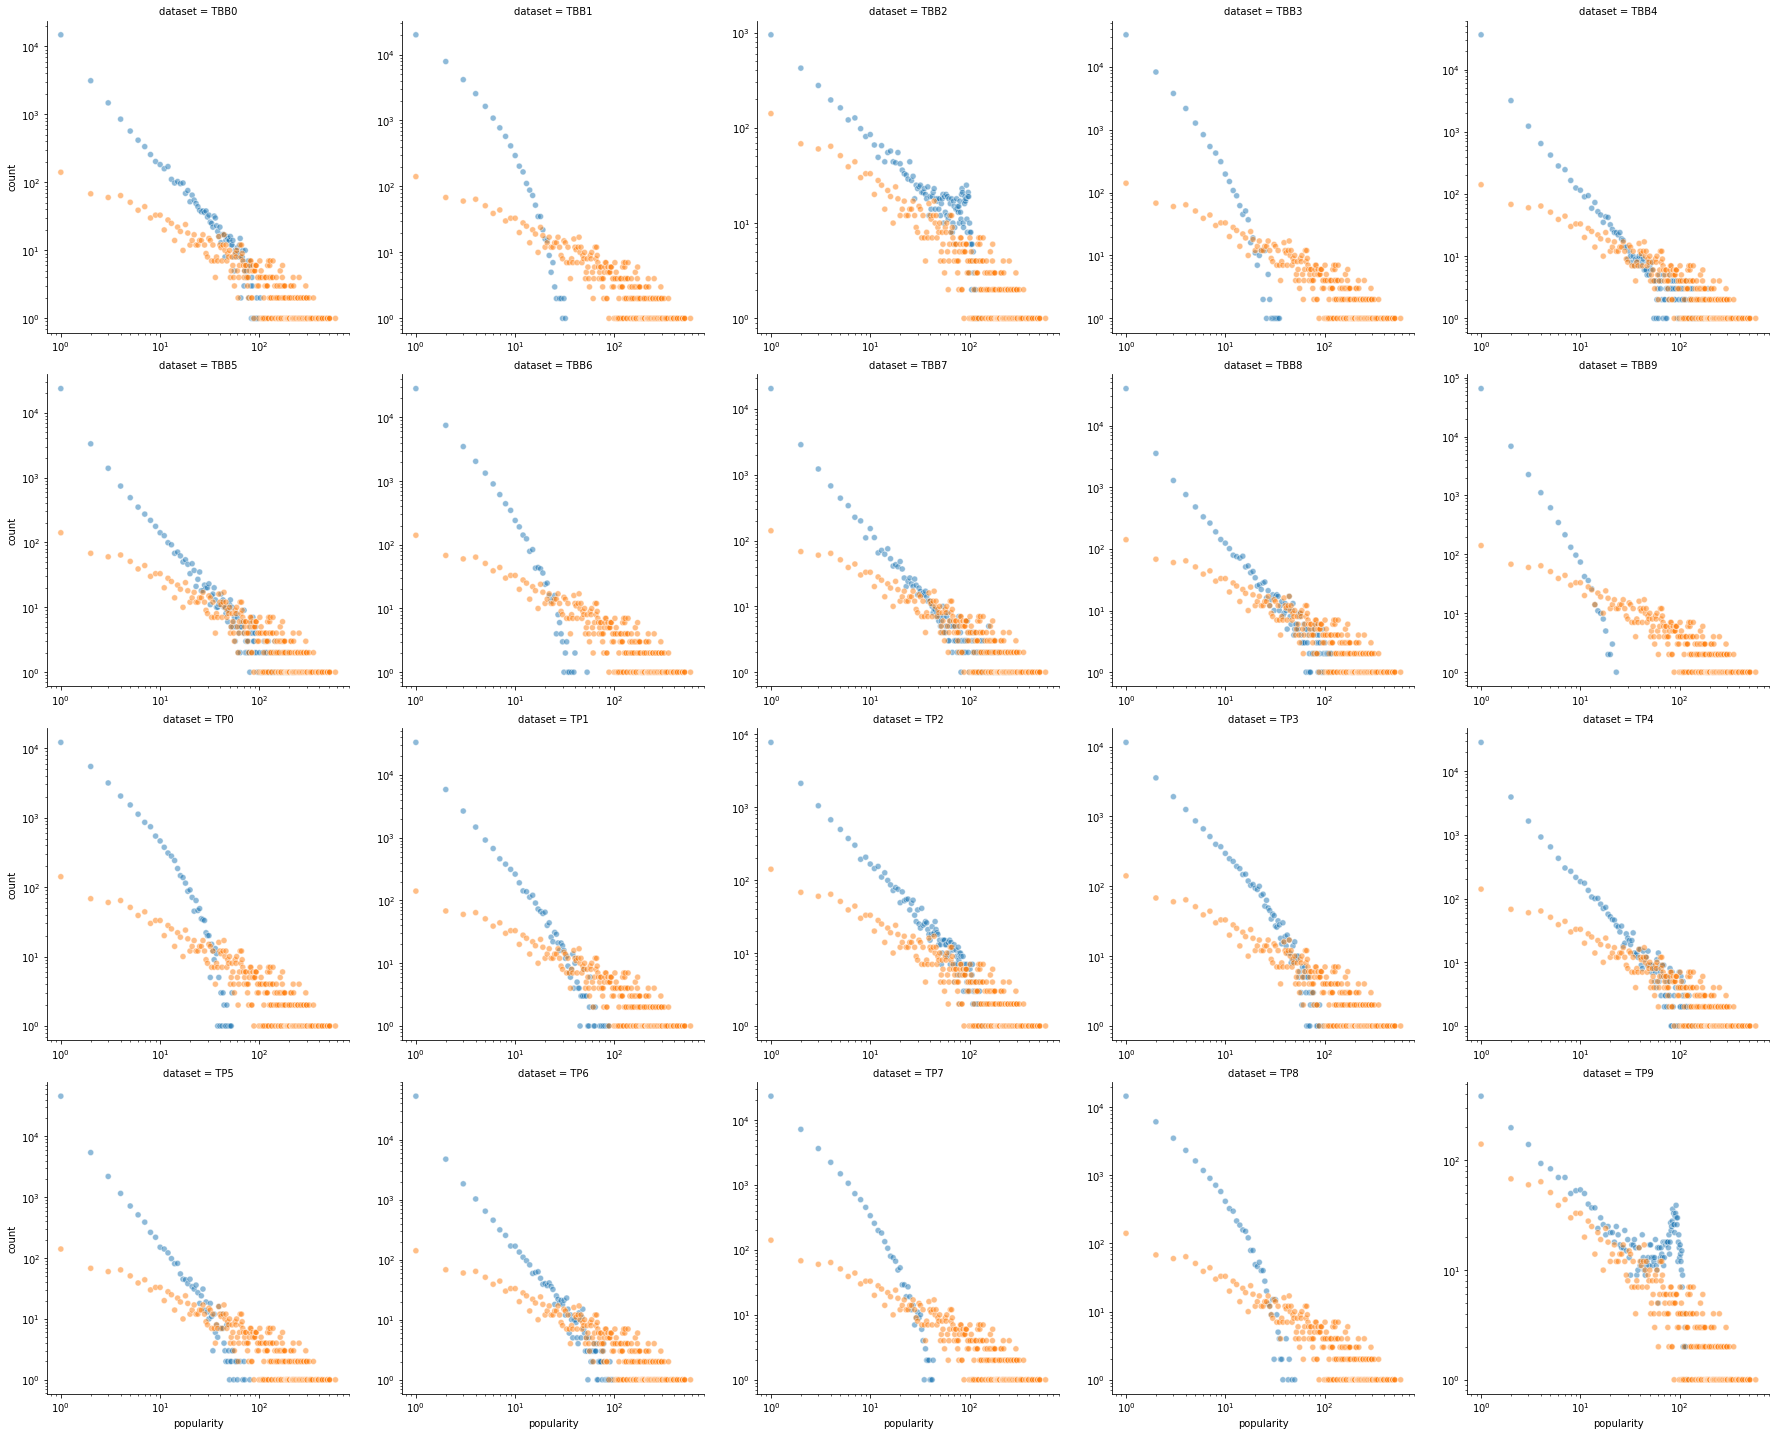

In [46]:
g = sns.FacetGrid(popularity_counts, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'popularity', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_pop_counts)
     .set(xscale='log', yscale='log'))

#### Top10 parameters sorted by sum of squares of item popularity and user activity KL

In [47]:
ml_100k_results, user_profile_df, item_popularity_df = summarize_datasets(d_params)

dataset stats
    dataset  nusers  nitems  npairs   density
0   ml_100k     943    1682  100000  0.063047
1      TBB0     943    1916  101059  0.055933
2      TBB1     943    1984   98256  0.052518
3      TBB2     943    1789  101090  0.059922
4      TBB3     943    1902  100553  0.056063
5      TBB4     943    2283   98609  0.045804
6      TBB5     943    1687   95805  0.060223
7      TBB6     943    1987   99700  0.053209
8      TBB7     943    1600   98691  0.065410
9      TBB8     943    1768   99963  0.059958
10     TBB9     943    1907  100814  0.056061
11      TP0     943    1950  106769  0.058063
12      TP1     943    2195  106532  0.051468
13      TP2     943    1765  107475  0.064573
14      TP3     943    1782   95213  0.056660
15      TP4     943    2460  105170  0.045336
16      TP5     943    2187  103834  0.050348
17      TP6     943    2156  106025  0.052149
18      TP7     943    2324  107248  0.048937
19      TP8     943    1805  109293  0.064210
20      TP9     943 

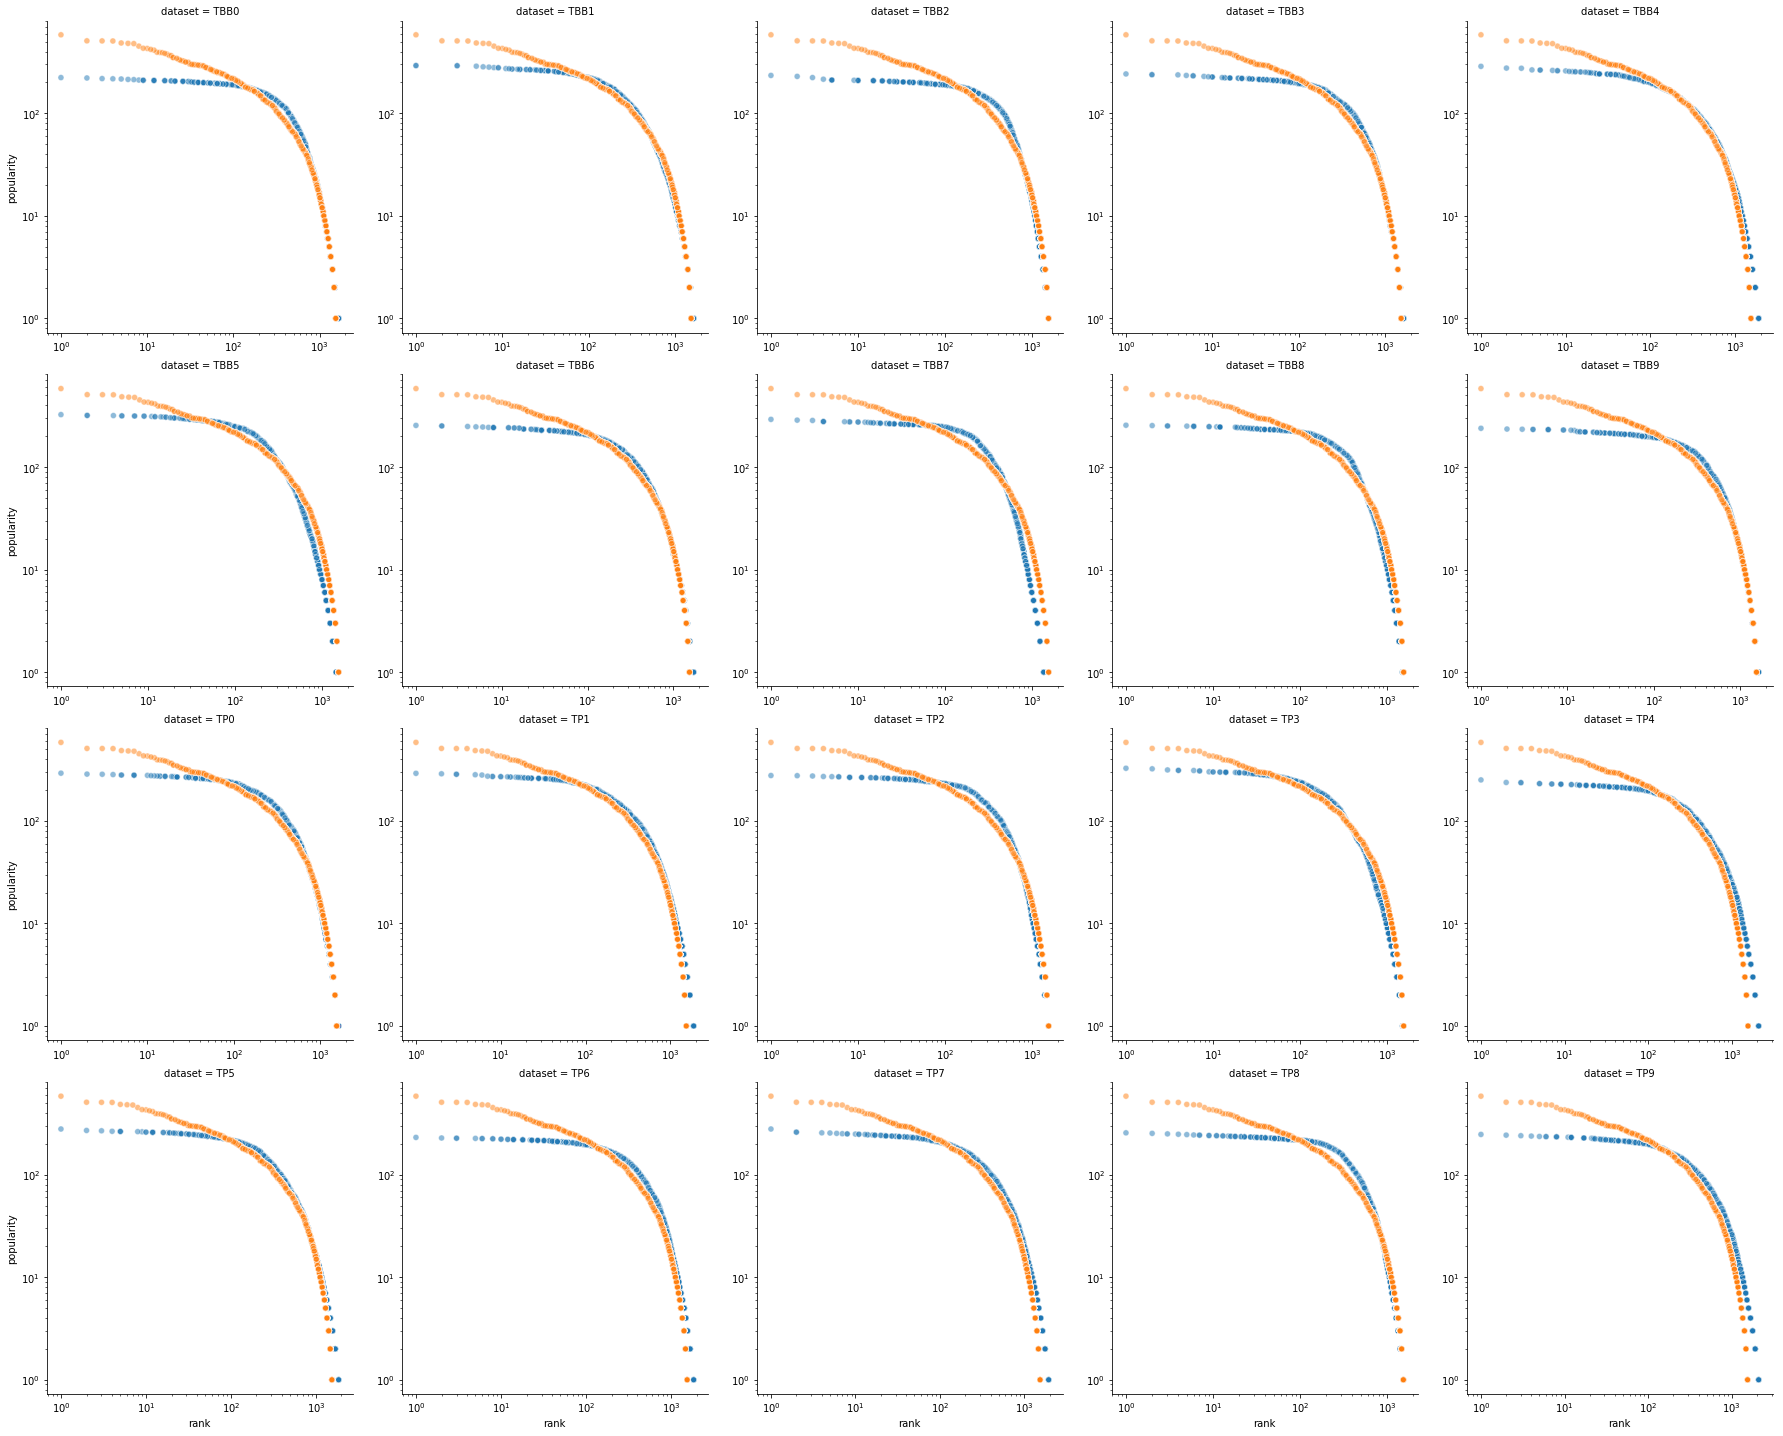

In [48]:
g = sns.FacetGrid(item_popularity_df, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'rank', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_results[1])
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity'))

In [49]:
popularity_counts = (item_popularity_df[['dataset', 'count']].groupby(['dataset', 'count'])
                     .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))
ml_100k_pop_counts = (ml_100k_results[1][['dataset', 'count']].groupby(['dataset', 'count'])
                      .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))

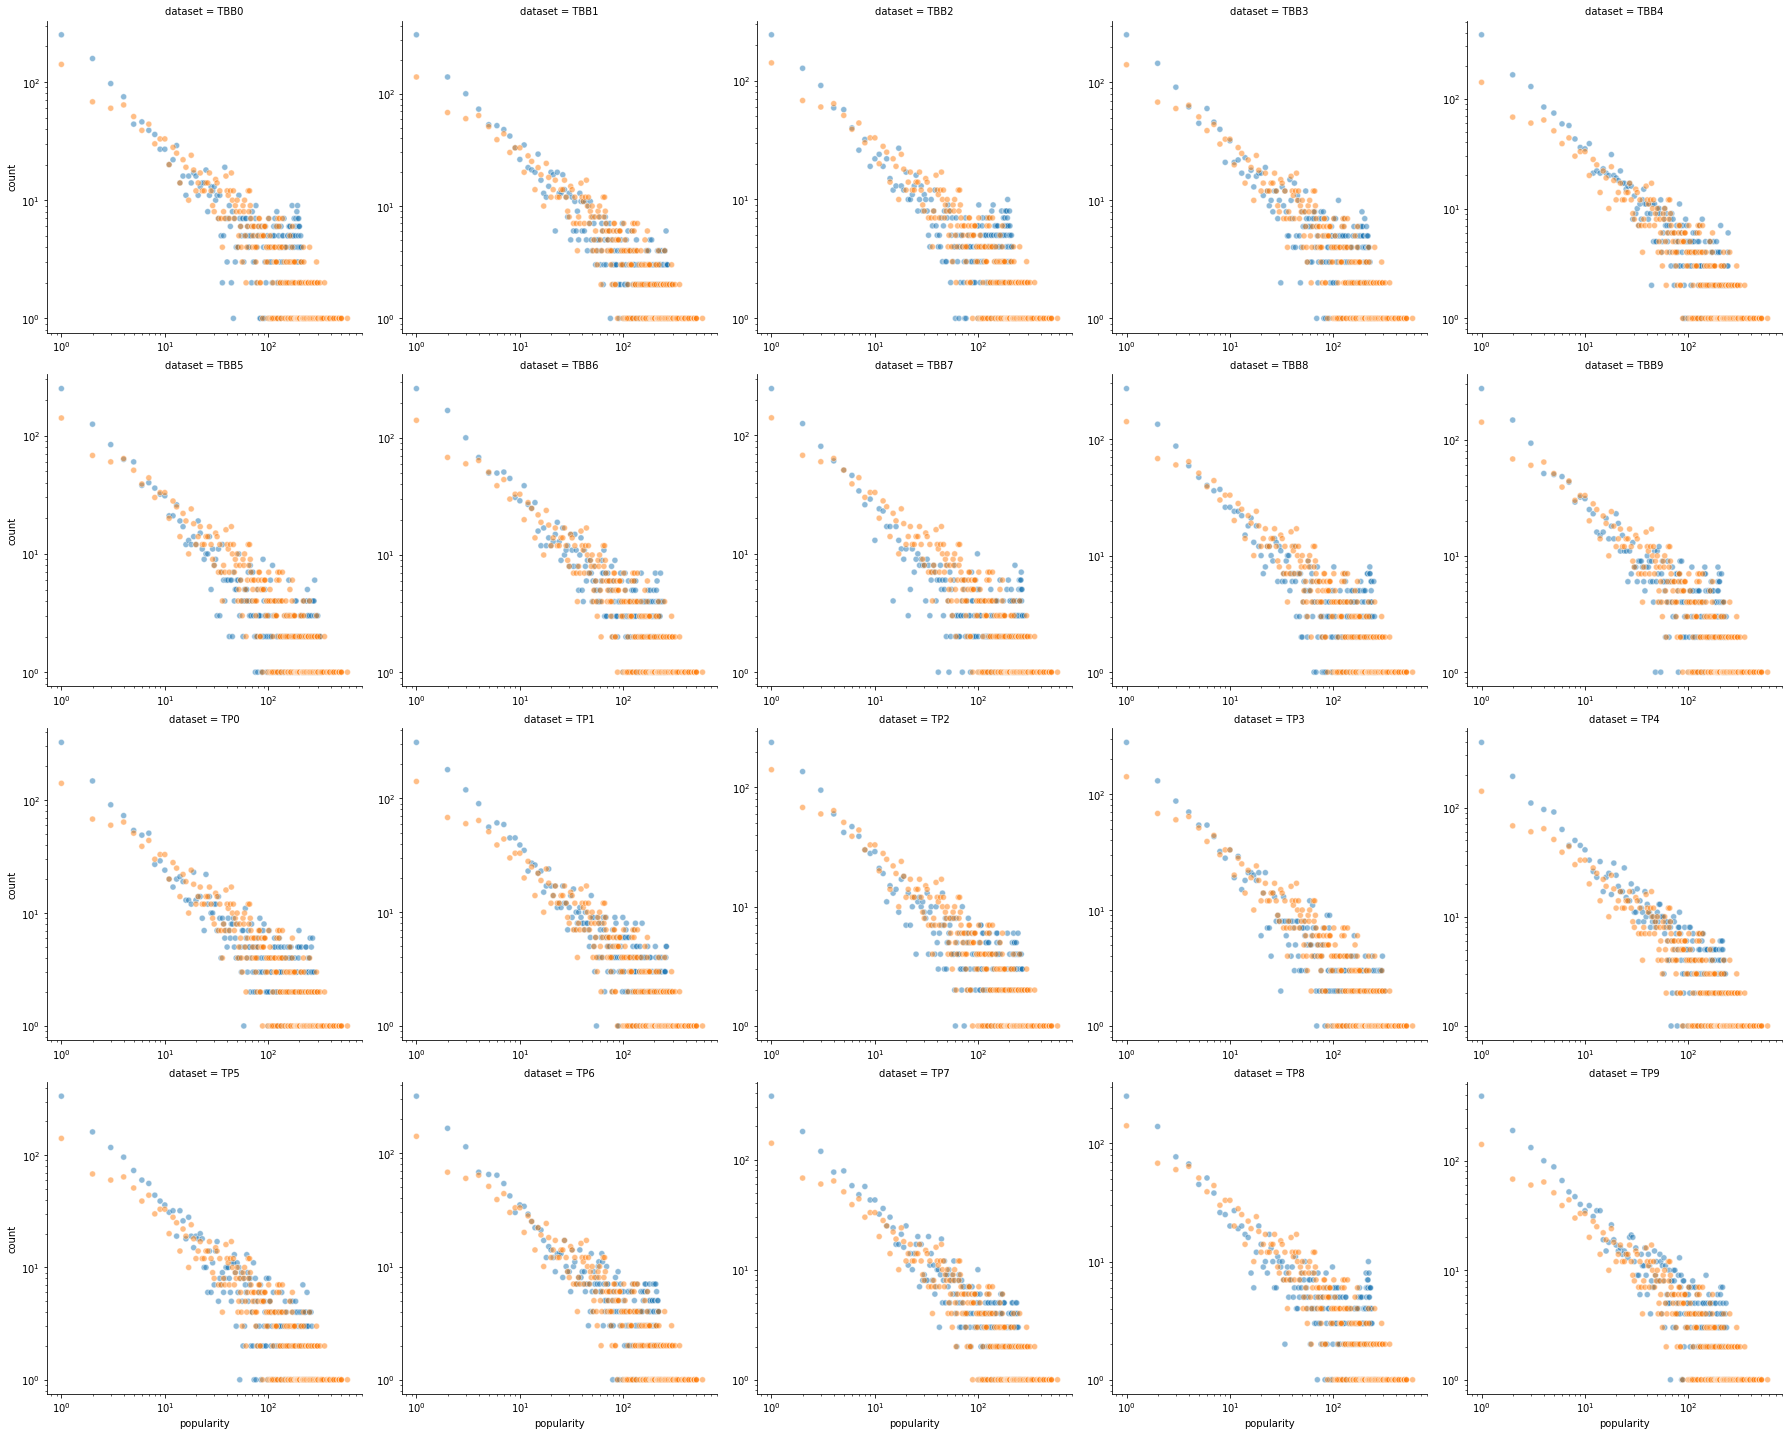

In [50]:
g = sns.FacetGrid(popularity_counts, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'popularity', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_pop_counts)
     .set(xscale='log', yscale='log'))

In [65]:
user_profile_model1 = user_profile_df[user_profile_df['dataset'].isin(['ml_100k', 'simulated_beta_binomail'])].copy()
user_profile_model1['group'] = 1
user_profile_model2 = user_profile_df[user_profile_df['dataset'].isin(['ml_100k', 'simulated_pareto'])].copy()
user_profile_model2['group'] = 2
user_profile_models = pd.concat([user_profile_model1, user_profile_model2])

In [ ]:
g = sns.FacetGrid(user_profile_models.groupby(['group', 'dataset', 'item'], as_index=False).count().sort_values(['group', 'dataset', 'item']), col='group', hue='dataset', height=6)
g = (g.map(sns.scatterplot, 'item', 'user', alpha=0.7)
     .add_legend()
     .set_axis_labels('user profile size', 'number of users'))

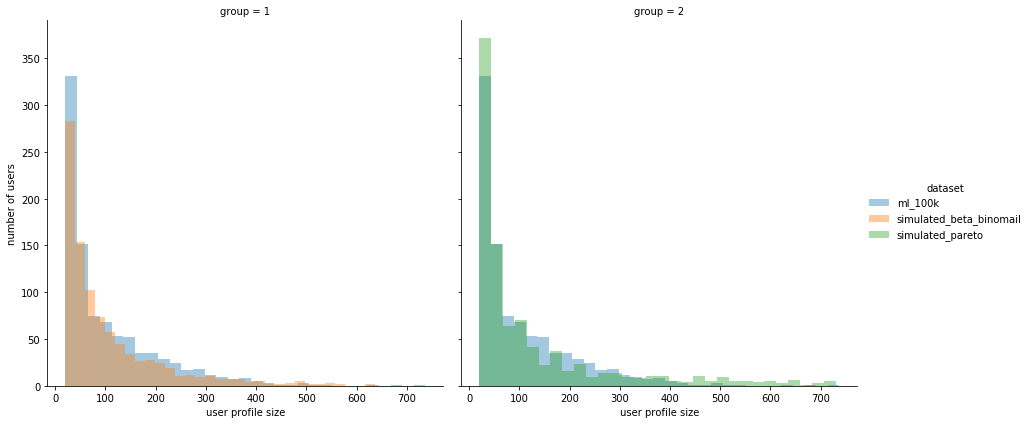

In [57]:
g = sns.FacetGrid(user_profile_models, col='group', hue='dataset', height=6)
g = (g.map(sns.distplot, 'item', kde=False)
     .add_legend()
     .set_axis_labels('user profile size', 'number of users'))
plt.show()

In [58]:
item_popularity_df.head()

item  user  dataset   rank
0     1   452  ml_100k    8.0
1     2   131  ml_100k  239.0
2     3    90  ml_100k  372.0
3     4   209  ml_100k  107.0
4     5    86  ml_100k  388.0

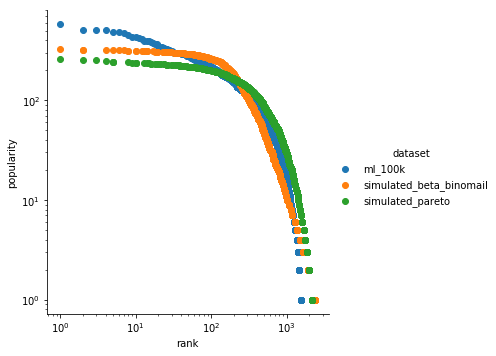

In [59]:
g = sns.FacetGrid(item_popularity_df, hue='dataset', height=5)
g = (g.map(plt.scatter, 'rank', 'user')
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity')
     .add_legend())

In [60]:
count_popularity.head()

dataset  user  count
0  ml_100k     1    141
1  ml_100k     2     68
2  ml_100k     3     60
3  ml_100k     4     64
4  ml_100k     5     51

In [50]:
count_popularity_model1 = count_popularity[count_popularity['dataset'].isin(['ml_100k', 'simulated_beta_binomail'])].copy()
count_popularity_model1['group'] = 1
count_popularity_model2 = count_popularity[count_popularity['dataset'].isin(['ml_100k', 'simulated_pareto'])].copy()
count_popularity_model2['group'] = 2
count_popularity_models = pd.concat([count_popularity_model1, count_popularity_model2])

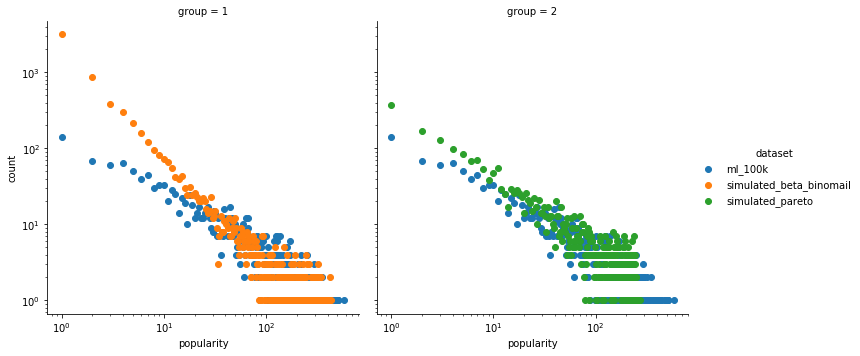

In [51]:
g = sns.FacetGrid(count_popularity_models, col='group', hue='dataset', height=5)
g = (g.map(plt.scatter, 'user', 'count')
     .set(xscale='log', yscale='log')
     .set_axis_labels('popularity', 'count').add_legend())

In [246]:
from scipy.stats import entropy

In [247]:
tall_popularity_count = count_popularity_model1.pivot_table(index='user', columns='dataset', values='count')

In [248]:
p = np.ones(max(tall_popularity_count['ml_100k'].dropna().index))

In [249]:
p[tall_popularity_count['ml_100k'].dropna().index.values - 1] += tall_popularity_count['ml_100k'].dropna().values

In [250]:
p /= p.sum()

In [251]:
q = np.ones(max(tall_popularity_count['simulated_beta_binomail'].dropna().index))

In [252]:
q[tall_popularity_count['simulated_beta_binomail'].dropna().index.values - 1] += tall_popularity_count['simulated_beta_binomail'].dropna().values

In [253]:
q /= q.sum()

In [254]:
lb = min(len(q), len(p))

In [255]:
entropy(q[:lb], p[:lb])

0.09075708186382384

In [256]:
tall_popularity_count = count_popularity_model1.pivot_table(index='user', columns='dataset', values='count', fill_value=0)

In [257]:
p = tall_popularity_count['ml_100k'] + 1

In [258]:
p /= p.sum()

In [259]:
q = tall_popularity_count['simulated_beta_binomail'] + 1

In [260]:
q /= q.sum()

In [261]:
entropy(q, p)

0.23545846119972072